In [4]:
import numpy as np
import nilearn
from nilearn import plotting
import scipy.io as sio
from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib
from matplotlib import pyplot as plt

In [18]:
def remap_cost(interval, fc, subtype):
    """Cost function: the cost of remapping each node in matrix A to every other node in matrix B. 
        Output is fed into graph matching algorithm"""
    allsubs=list()
    nROIs=fc[0][0].shape[0]
    #calculate cost between all ROIs
    for i in range(0,fc.shape[0]): #subject 
        sub=np.zeros((nROIs,nROIs))
        
        for x in range(0,nROIs): #x = time point 1.
            a=fc[i,interval[0]][x]
            
            for y in range(0,nROIs): #y = time point 2.
                b=fc[i,interval[1]][y]
                costmat[x,y]=distance.euclidean(a,b)
        costmat_all.append(costmat)
        
    graph_matching(costmat_all, interval, fc, subtype)

In [ ]:
def graph_matching(costmat_all, interval, nROIs, subtype)
    """Runs graph matching w/ the Hungarian algorithm and saves outputs:
    
        cols_SXSY.txt - each row is a different subject. Values in each column represent the node
        in the latter time point that the node in the prior time point was mapped to.
        
        roichanges_SXSY.txt - each row is a different subject. Values in each column represent 
        whether the node was remapped to a DIFFERENT node than itself in the subsequent time point 
        (elements are 0 or 1, 1 if the node was remapped to a different node and 0 if the node was mapped to itself.
        Used to calculate remap frequency for each region, when averaged vertically (across subjects)."""
    
    nROIs=fc[0][0].shape[0]
    nsubs=costmat_all.shape[0] #test
    
    rows=np.zeros((nsubs,nROIs))
    cols=np.zeros((nsubs,nROIs))
    roichanges=np.zeros((nsubs,nROIs))
    truecols=range(0,nROIs)

    for i in range(0, nsubs):
        cost=costmat[i]
        rowind, colind=linear_sum_assignment(cost) #graph matching part.
        rows[i]=rowind
        cols[i]=colind
    
    np.savetxt(str('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/'+ subtype +'/cols_'+ str('S'+str(intervals[0][0]+1)+'S'+ str(intervals[0][1]+1))+'.txt', cols))

    for j in range(0,nsubs):
        for i in range(0,nROIs):
            if cols[j][i]!=truecols[i]:
                roichanges[j][i]=1 #indices that are switched

    np.savetxt(str('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/'+ subtype +'/roichanges_' + str('S'+str(intervals[0][0]+1)+'S'+ str(intervals[0][1]+1)) +'.txt', allchanges)


In [ ]:
def process_data(interval, fc, subtype):
    


In [21]:
subtype=['stroke', 'control']
for j in range(0, 1):
    fc=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/stroke/FCprecision.mat')
    fc=fc['partialcorr']
    intervals=[[0, 1], [1, 2], [2, 3], [3, 4]] #time point comparisons. 0=1, 1=2, etc.
    
    for i in range(0, intervals.shape):

    costmap=process_data(intervals[i], fc, subtype[j])


[[array([[0.07457177, 0.13828561, 0.10108338, ..., 0.14400263, 0.10962802,
        0.11016421],
       [0.09579243, 0.10292089, 0.09856463, ..., 0.13146581, 0.10260984,
        0.1058288 ],
       [0.08917368, 0.13043268, 0.0609626 , ..., 0.12847675, 0.10141227,
        0.10351761],
       ...,
       [0.11153983, 0.13369286, 0.10216218, ..., 0.08576754, 0.07002084,
        0.07178292],
       [0.09719058, 0.12186352, 0.08686035, ..., 0.09908506, 0.04573066,
        0.04119435],
       [0.0890101 , 0.12750461, 0.08234152, ..., 0.10343104, 0.04218417,
        0.02342294]]), array([[0.18339196, 0.14273366, 0.17426553, ..., 0.24705814, 0.18859354,
        0.18973242],
       [0.21286391, 0.09012966, 0.15611223, ..., 0.21034208, 0.129198  ,
        0.13952344],
       [0.20830447, 0.14577816, 0.1187081 , ..., 0.24908885, 0.19230465,
        0.19376003],
       ...,
       [0.31099842, 0.24185237, 0.26953429, ..., 0.19716472, 0.21576753,
        0.22786778],
       [0.26606391, 0.15944642, 

In [10]:
print(3)

3


In [3]:

#calculate cost between all ROIs

#load FC matrices
fc=sio.loadmat('/Users/emilyolafson/Documents/Thesis/SUB24_47_data/FCprecision.mat')
fc=fc['partialcorr']
allsubs_S1S2=list()
allsubs_nopenalty_S1S2=list()

#calculate cost between all ROIs
#between time point 1 and 2
for i in range(23,47): #subject 
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,0][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,1][y]
            sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_nopenalty_S1S2.append(sub_nopenalty)
    


In [4]:
#between time point 2 and 3
allsubs_S2S3=list()
allsubs_nopenalty_S2S3=list()

for i in range(23,47): #subject 
    if i==19:
        continue
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,1][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,2][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S2S3.append(sub)
    allsubs_nopenalty_S2S3.append(sub_nopenalty)

In [5]:
#between time point 3 and 4
allsubs_S3S4=list()
allsubs_nopenalty_S3S4=list()

for i in range(23,47): #subject 
    if i==19 or i==11:
        continue
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,2][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,3][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S3S4.append(sub)
    allsubs_nopenalty_S3S4.append(sub_nopenalty)

In [6]:
#between time point 4 and 5
allsubs_S4S5=list()
allsubs_nopenalty_S4S5=list()

for i in range(23,47): #subject 
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,3][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,4][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S4S5.append(sub)
    allsubs_nopenalty_S4S5.append(sub_nopenalty)

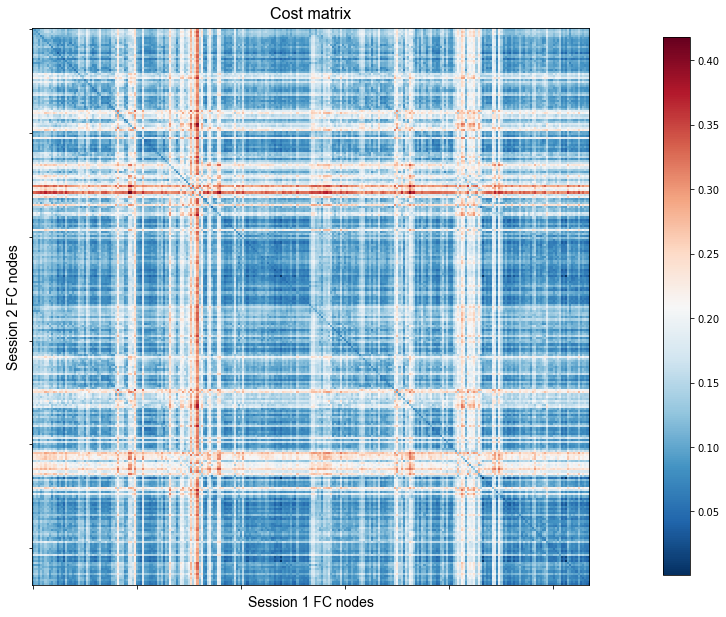

In [7]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}


fig = plt.figure(figsize=(10, 10))
plt.ylabel("Session 2 FC nodes", **axis_font)
plt.xlabel("Session 1 FC nodes", **axis_font)
plt.title("Cost matrix", **title_font)

#plotting.plot_matrix(allsubs_nopenalty_S2S3[13], figure=fig)
plotting.plot_matrix(allsubs_nopenalty_S2S3[8], figure=fig)


In [9]:
rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))
truecols=range(0,268)

for i in range(0,24):
    cost=allsubs_nopenalty_S1S2[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_nopenalty_S1S2.txt', cols)
    
for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)

np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_nopenalty_S1S2.txt', allchanges)


In [72]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))
truecols=range(0,268)

for i in range(0,24):
    cost=allsubs_S1S2[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_S1S2.txt', cols)
    
for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)

np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_S1S2.txt', allchanges)


In [10]:
rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_nopenalty_S2S3[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind


np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_nopenalty_S2S3.txt', cols)

for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(cols.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

#cvals=allchanges/0.35
#viridis = cm.get_cmap('viridis', 268)
#color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_nopenalty_S2S3.txt', allchanges)

(24, 268)


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_S2S3[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind


np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_S2S3.txt', cols)

for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(cols.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

#cvals=allchanges/0.35
#viridis = cm.get_cmap('viridis', 268)
#color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_S2S3.txt', allchanges)

In [11]:
rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_nopenalty_S3S4[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_nopenalty_S3S4.txt', cols)

for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_nopenalty_S3S4.txt', allchanges)

(24, 268)


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_S3S4[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_S3S4.txt', cols)

for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_S3S4.txt', allchanges)

In [12]:
rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_nopenalty_S4S5[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_nopenalty_S4S5.txt', cols)


for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_nopenalty_S4S5.txt', allchanges)

(24, 268)


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((24,268))
cols=np.zeros((24,268))
roichanges=np.zeros((24,268))

for i in range(0,24):
    cost=allsubs_S4S5[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/cols_S4S5.txt', cols)


for j in range(0,24):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/control/roichanges_S4S5.txt', allchanges)

In [5]:
node_coords=sio.loadmat('/Users/emilyolafson/Documents/Thesis/software/shen_268_centers.mat')
node_coords=node_coords['a']

In [250]:
cmap='inferno'


In [5]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [4]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [3]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [6]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [7]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [8]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [9]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [10]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [11]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [12]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [13]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [14]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [301]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_3.mat')
a=a['remap1']
print(a)
#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [16]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [17]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [18]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg')

In [19]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [20]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [21]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)